# Development of video using Matplotlib


In [2]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from numpy.fft import fft, ifft
from scipy.signal import convolve2d

## Generates a XZ field and show plots for each z

In [3]:
# Initial parameters
x0 = np.linspace(-300*um, 300*um, 512)
z0 = np.linspace(-0.125*um, 800*um, 1024)
wavelength = 0.6238*um * 10

# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)

In [4]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)

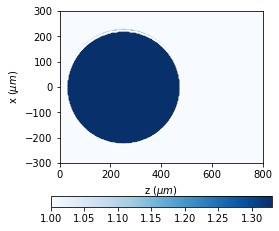

In [5]:
# insert cylinder
u1.cylinder(r0=(0, 250*um),
          radius=(225*um, 225*um),
          refractive_index=1.33,
          angle=0)
u1.draw_refractive_index(scale='scaled', colorbar_kind='horizontal')


In [6]:
# propagation
u1.WPM(verbose=False, has_edges=True)

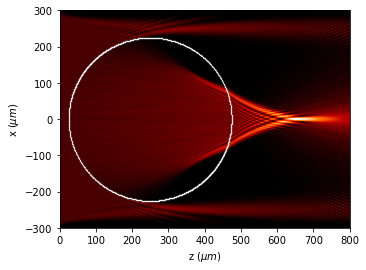

In [7]:
u1.draw(logarithm=True, scale='scaled', draw_borders=True)


In [8]:
seconds = 1.
u1.video(kind='intensity',
         logarithm=True,
         normalize=False,
         time_video=10 * seconds,
         frames_reduction=5,
         filename='creating_video.mp4',
         dpi=100)


In [9]:
%%HTML
<div align="middle">
<video width="100%" controls>
      <source src="creating_video.mp4" type="video/mp4">
</video></div>

## Generates a XYZ field and show plots XY for each z

In [10]:
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_masks_XY import Scalar_mask_XY


In [16]:
wavelength0 = 0.6238*um

size = 250*um
num_data = 256
x0 = np.linspace(-size/2, size/2, num_data)
y0 = np.linspace(-size/2, size/2, num_data)
z0 = np.linspace(500*um, 1.5*mm, 64)


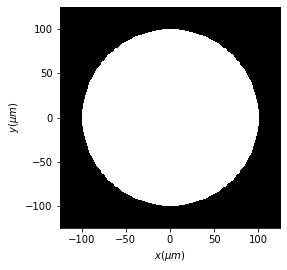

In [17]:
radius = 100*um
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength0)
t1.circle(r0=(0*um, 0*um),radius=radius, angle=0*degrees)
t1.draw()

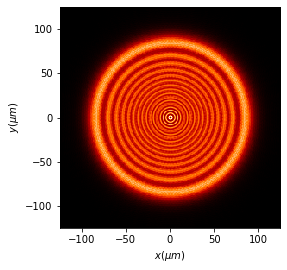

In [21]:
u2=t1.RS(z=500*um, verbose=True)
u2.draw()

In [19]:
u_xyz = Scalar_field_XYZ(x0, y0, z0, wavelength0)
u_xyz.incident_field(t1)
u_xyz.RS(num_processors=1)

time in RS= 14.639429330825806. num proc= 4


In [20]:
u_xyz.video('video_circle.mp4', axis='auto', fps=10)

%%HTML
<div align="middle">
<video width="100%" controls>
      <source src="video_circle.mp4" type="video/mp4">
</video></div>